# Figures for PPSN-2024

This notebook present the different results obtained and present in the paper "Low-complexity Genetic Reinforcement Learning for Robot Arm Trajectory Planning" submitted for the conference PPSN-2024

#### Importation of the libraries

In [28]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import math

import csv

#### Preparing colors formating of the figures

In [29]:
def classic_format():
    ax = plt.gca()
    #plt.grid(color='white', zorder = 0)
    #ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    #ax.tick_params(axis='both', which='both', length=0)
    #plt.legend()

l_colors = ["#ca0020", "#f4a582", "#92c5de", "#0571b0", "#ca0020", "#f4a582", "#92c5de", "#0571b0", "#ca0020", "#f4a582", "#92c5de", "#0571b0"]

## Results for the Experimental Study

### Loading the training results of the Experimental Study

In [30]:
path = "data/GegelatiExperimentalStudy/"

l_keys = [
    "360 - 50%",
    "360 - 75%",
    "360 - 95%",
    "All instructions - 360 - 50%",
    "CL1 - fake",  # CL with error
    "2000 - 99%",
    "2000 - 90%",
    "2000 - 95%",
    "1000 - 98%",
    "3000 - 99.33%",
    "5000 - 99.6%",
    "2000 - 99% - All Instr",
    "2000 - 99% - rad",
    "2000 - 99% - 2d",
    "2000 - 99% - 3d",
    "2000 - 99% - rad - 3d",
    "2000 - 99% - no instr",
    "2000 - 99% - 2d - rad",
    "2000 - 99% - 2d - 3d",
    "360 - 50% - no instr",
    "360 - 50% - all instr",
    "360 - 50% - 2d",
    "360 - 50% - 3d",
    "360 - 50% - rad",
    "360 - 50% - 2d - rad",
    "360 - 50% - 2d - 3d",
    "360 - 50% - CL1",
    "360 - 50% - CL2",
    "2000 - 99% - CL1",
    "2000 - 99% - CL2",
]
d_keys_info = {key: [5, 7200] for key in l_keys}
training_df = dict()

for index_file_rev, key in enumerate(reversed(l_keys)):
    index_file = len(l_keys) - 1 - index_file_rev
    l_dataframe = []
    for i in range(d_keys_info[key][0]):
        df = pd.read_csv(path+"config_" + str(index_file) + "_"+ str(i) +"/outLogs/logsGegelati.ods", sep='\s+', skiprows=1)

        # Calculer la différence entre chaque ligne et sa précédente
        df['T_total2'] = df['T_total'].astype(int).diff()
        df.at[0, 'T_total2'] = df.at[0, 'T_total']
        

        for index, time in enumerate(df["T_total2"]):
            used_time = math.trunc(time)
            if df.at[index, 'T_total'] > d_keys_info[key][1]:
                used_time = d_keys_info[key][1] - math.trunc(df.at[index - 1, 'T_total'])

            df_duplications = pd.DataFrame([df.iloc[index]] * math.trunc(used_time-1), columns=df.columns)
            df = pd.concat([df, df_duplications], ignore_index=True)

        df.sort_values(by="Gen", inplace=True)
        df.reset_index(drop=True, inplace=True)

        df["ScaledTime"] = df.index

        l_dataframe.append(df)


    training_df[key] = l_dataframe


l_dataframe[0].describe()

C:\Users\qvacher\AppData\Local\Temp\ipykernel_12632\2245832765.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_duplications], ignore_index=True)


,Gen,NbVert,tRewAvg,tRewMax,tDistMax,vRewAvg,vRewMax,vDistMax,vSuccess,T_mutat,T_eval,T_val,T_total,T_total2,ScaledTime
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,126.458750,471.318472,-151.241581,-109.129547,111.563433,-103.309347,-97.719844,100.405383,0.164496,0.168142,23.619221,4.467472,3618.302871,35.574758,3599.500000
std,60.314889,23.672151,68.899484,48.691237,47.618998,58.644396,51.493671,50.315087,0.088612,0.045325,7.398498,1.509961,2082.926224,8.865539,2078.605302
min,0.000000,378.000000,-409.400000,-330.930000,77.910000,-384.720000,-357.690000,69.490000,0.000000,0.010000,6.760000,0.930000,14.590000,14.590000,0.000000
25%,79.000000,456.000000,-159.380000,-113.260000,86.280000,-111.690000,-107.060000,74.080000,0.090000,0.140000,17.140000,3.070000,1815.720000,28.000000,1799.750000
50%,134.000000,475.000000,-125.550000,-88.190000,91.350000,-73.340000,-71.270000,74.860000,0.220000,0.190000,24.440000,4.530000,3616.820000,37.000000,3599.500000
75%,178.000000,490.000000,-106.890000,-82.840000,113.700000,-71.050000,-70.400000,107.910000,0.220000,0.200000,30.120000,5.860000,5413.780000,43.000000,5399.250000
max,218.000000,506.000000,-92.660000,-74.080000,330.930000,-67.800000,-65.430000,357.690000,0.250000,0.230000,36.160000,7.090000,7212.800000,50.000000,7199.000000


### Pareto showing results compare to the number of roots

[0.89010989 0.3956044  0.         1.         0.45054945 0.01098901
 0.01098901 0.01098901 0.01098901]


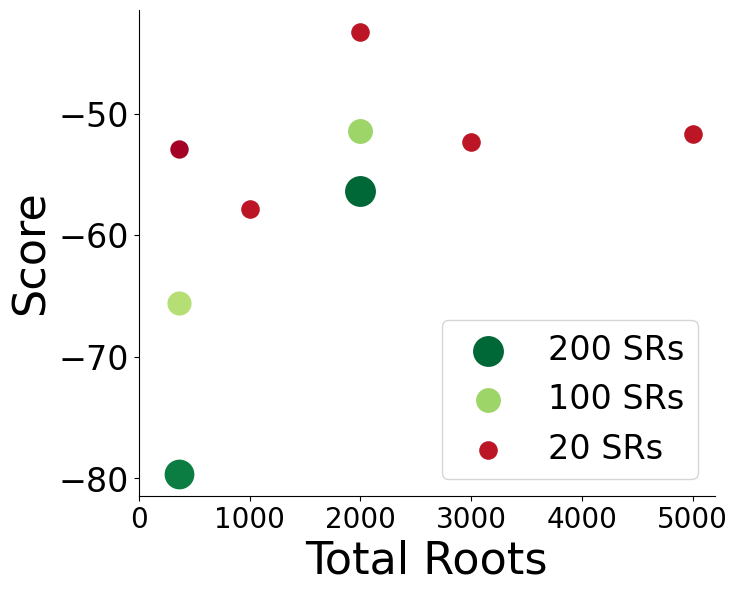

In [31]:
fig = plt.figure(figsize=(8,6))

critere_y = "vRewMax"
critere_x = "Gen"
critere_z = "vSuccess"

l_keys_used = [
    "360 - 50%",
    "360 - 75%",
    "360 - 95%",
    "2000 - 90%",
    "2000 - 95%",
    "2000 - 99%",
    "1000 - 98%",
    "3000 - 99.33%",
    "5000 - 99.6%",
]


l_marker = ["o"]


axis_x_val = [360, 360, 360, 2000, 2000, 2000, 1000, 3000, 5000]
axis_y_val = [180, 90, 18, 200, 100, 20, 20, 20, 20]

all_values_y = [np.mean(np.amax(pd.concat([df[critere_y] for df in training_df[key]], axis=1), axis=0)) for key in l_keys_used]
# Calcul des couleurs en fonction de axis_y_val avec une échelle logarithmique
norm = mcolors.LogNorm(vmin=min(axis_y_val), vmax=max(axis_y_val))
colors = plt.cm.RdYlGn(norm(axis_y_val))


norm_sizes = mcolors.Normalize(vmin=min(axis_y_val), vmax=max(axis_y_val))
sizes = norm_sizes(axis_y_val)
l_legend = ["200 SRs", "100 SRs","20 SRs"]
print(sizes)
for i, key in enumerate(l_keys_used):
    if i > 2 and i < 6:
        plt.scatter(axis_x_val[i], all_values_y[i], color=colors[i], 
                    zorder=i+10, marker=l_marker[0],
                    s=(sizes[i]+0.5)*300, label=l_legend[i-3])
    else:
        plt.scatter(axis_x_val[i], all_values_y[i], color=colors[i], 
                    zorder=i+10, marker=l_marker[0],
                    s=(sizes[i]+0.5)*300)
    #plt.text(axis_x_val[i]-300, axis_y_val[i]+8, f'{all_values_y[i]:.1f}', fontsize=18, ha='left', va='bottom')


classic_format()


#plt.yscale('log')
#plt.ylim(0.5, 100)
plt.xlim(0, 5200)
plt.ylabel("Score", fontsize=32)
plt.xlabel("Total Roots", fontsize=32)
plt.legend(fontsize=24)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=24)
plt.subplots_adjust(left=0.2, right=0.92, top=0.96, bottom=0.15)
plt.savefig('results/NbRootsSRComp.pdf', format="pdf", dpi=1000)
plt.show()

### Results for variation on the number of roots

In [32]:
critere_y = "vRewMax"
critere_z = "vSuccess"
critere_x = "Gen"
l_keys_used =  [
    "360 - 50%",
    "360 - 75%",
    "360 - 95%",
    "2000 - 99%",
    "2000 - 90%",
    "2000 - 95%",
    "1000 - 98%",
    "3000 - 99.33%",
    "5000 - 99.6%",
    
    "2000 - 99% - no instr",
]


label_used_here = {key : key for key in l_keys_used}
for key in label_used_here:
    label_used_here[key] = label_used_here[key].replace("%", "\%")


for index, key in enumerate(l_keys_used):
    all_values_z = pd.concat([df[critere_z] for df in training_df[key]], axis=1)
    all_values_y = pd.concat([df[critere_y] for df in training_df[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_df[key]], axis=1)

    mean_values_z = all_values_z.mean(axis=1)

    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)

    max_scores_of_each = np.amax(all_values_y, axis=0)
    max_success_of_each = np.amax(all_values_z, axis=0)


    #print("{} & {} & {} & {} & {}  & {}\\%  \\\\".format(
    #    label_used_here[key], np.around(np.mean(max_scores_of_each),1),  np.around(np.std(max_scores_of_each),1), np.around(np.amin(max_scores_of_each),1), np.around(np.amax(max_scores_of_each),1), np.around(func1(mean_values_z),2)))

    print("{}($\\pm{}$) & {}($\\pm{})\\%  \\\\".format(
        np.around(np.mean(max_scores_of_each),1),  np.around(np.std(max_scores_of_each),1), np.around(np.mean(max_success_of_each)*100),  np.around(np.std(max_success_of_each)*100
        )))



-79.6($\pm17.0$) & 20.0($\pm8.0)\%  \\
-65.6($\pm10.4$) & 21.0($\pm10.0)\%  \\
-52.9($\pm28.7$) & 39.0($\pm18.0)\%  \\
-43.3($\pm23.8$) & 39.0($\pm10.0)\%  \\
-56.3($\pm13.6$) & 35.0($\pm9.0)\%  \\
-51.4($\pm25.5$) & 35.0($\pm15.0)\%  \\
-57.9($\pm37.7$) & 33.0($\pm17.0)\%  \\
-52.3($\pm6.3$) & 29.0($\pm6.0)\%  \\
-51.7($\pm39.9$) & 42.0($\pm16.0)\%  \\
-39.9($\pm12.9$) & 37.0($\pm14.0)\%  \\


### Results of the Curriculum Learning

In [33]:
critere_y = "vRewMax"
critere_z = "vSuccess"
critere_x = "Gen"
l_keys_used =  [
    "360 - 50%",
    "360 - 50% - CL1",
    "360 - 50% - CL2",
    "2000 - 99% - 2d",
    "2000 - 99% - CL1",
    "2000 - 99% - CL2"
]


label_used_here = {key : key for key in l_keys_used}
for key in label_used_here:
    label_used_here[key] = label_used_here[key].replace("%", "\%")


for index, key in enumerate(l_keys_used):
    all_values_z = pd.concat([df[critere_z] for df in training_df[key]], axis=1)
    all_values_y = pd.concat([df[critere_y] for df in training_df[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_df[key]], axis=1)

    mean_values_z = all_values_z.mean(axis=1)

    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)

    max_scores_of_each = np.amax(all_values_y, axis=0)
    max_success_of_each = np.amax(all_values_z, axis=0)


    #print("{} & {} & {} & {} & {}  & {}\\%  \\\\".format(
    #    label_used_here[key], np.around(np.mean(max_scores_of_each),1),  np.around(np.std(max_scores_of_each),1), np.around(np.amin(max_scores_of_each),1), np.around(np.amax(max_scores_of_each),1), np.around(func1(mean_values_z),2)))

    print("{}($\\pm{}$) & {}($\\pm{})\\%  \\\\".format(
        np.around(np.mean(max_scores_of_each),1),  np.around(np.std(max_scores_of_each),1), np.around(np.mean(max_success_of_each)*100),  np.around(np.std(max_success_of_each)*100
        )))



-79.6($\pm17.0$) & 20.0($\pm8.0)\%  \\
-260.6($\pm45.4$) & 5.0($\pm2.0)\%  \\
-219.3($\pm16.9$) & 11.0($\pm6.0)\%  \\
-40.4($\pm16.6$) & 47.0($\pm15.0)\%  \\
-174.5($\pm29.8$) & 33.0($\pm3.0)\%  \\
-220.0($\pm62.6$) & 16.0($\pm12.0)\%  \\


### Loading the instruction information of the results

In [34]:
import re

path = "data/GegelatiExperimentalStudy/"

d_keys_index = {j:i for i,j in enumerate([
    "360 - 50%",
    "360 - 75%",
    "360 - 95%",
    "All instructions - 360 - 50%",
    "CL1 - fake", # CL with error
    "2000 - 99%",
    "2000 - 90%",
    "2000 - 95%",
    "1000 - 98%",
    "3000 - 99.33%",
    "5000 - 99.6%",
    "2000 - 99% - All Instr",
    "2000 - 99% - rad",
    "2000 - 99% - 2d",
    "2000 - 99% - 3d",
    "2000 - 99% - rad - 3d",
    "2000 - 99% - no instr",
    "2000 - 99% - 2d - rad",
    "2000 - 99% - 2d - 3d",
    "360 - 50% - no instr",
    "360 - 50% - all instr",
    "360 - 50% - 2d",
    "360 - 50% - 3d",
    "360 - 50% - rad",
    "360 - 50% - 2d - rad",
    "360 - 50% - 2d - 3d",
    "360 - 50% - CL1",
    "360 - 50% - CL2",
    "2000 - 99% - CL1",
    "2000 - 99% - CL2",
])}
print(d_keys_index)
l_keys = list(d_keys_index.keys())



all_labels = []
instructionInfo = dict()

for index, key in enumerate(l_keys):
    if key=="progKC":
        continue
    l_instrInfo = []
    for i in range(5 if key!="trueSimu" else 2):
        values = [0 for _ in range(9+7)]
        with open(path+"config_" + str(d_keys_index[key]) + "_"+ str(i) +"/outLogs/out_best_stats_cleaned.md", "r") as file:
            lines = file.readlines()
            target_line = [line for line in lines if line.startswith('Use/instr')]
            valuesTemp = [[int(value[0]), int(value[1])] for value in re.findall(r'\{(\d+),(\d+)\}', target_line[0])]
            for valuetemp in valuesTemp:
                values[valuetemp[0]] = valuetemp[1]
        l_instrInfo.append(values)
        instructionInfo[key] = np.array(l_instrInfo)


{'360 - 50%': 0, '360 - 75%': 1, '360 - 95%': 2, 'All instructions - 360 - 50%': 3, 'CL1 - fake': 4, '2000 - 99%': 5, '2000 - 90%': 6, '2000 - 95%': 7, '1000 - 98%': 8, '3000 - 99.33%': 9, '5000 - 99.6%': 10, '2000 - 99% - All Instr': 11, '2000 - 99% - rad': 12, '2000 - 99% - 2d': 13, '2000 - 99% - 3d': 14, '2000 - 99% - rad - 3d': 15, '2000 - 99% - no instr': 16, '2000 - 99% - 2d - rad': 17, '2000 - 99% - 2d - 3d': 18, '360 - 50% - no instr': 19, '360 - 50% - all instr': 20, '360 - 50% - 2d': 21, '360 - 50% - 3d': 22, '360 - 50% - rad': 23, '360 - 50% - 2d - rad': 24, '360 - 50% - 2d - 3d': 25, '360 - 50% - CL1': 26, '360 - 50% - CL2': 27, '2000 - 99% - CL1': 28, '2000 - 99% - CL2': 29}


### Results for variation on the number of roots with the instructions used added

In [35]:
l_keys_used =  [
    "360 - 50%",
    "360 - 75%",
    "360 - 95%",
    "2000 - 99%",
    "2000 - 90%",
    "2000 - 95%",
    "1000 - 98%",
    "3000 - 99.33%",
    "5000 - 99.6%",
    "2000 - 99% - no instr",
]
d_val_per_key = dict()

label_used_here = {key : key for key in l_keys_used}
for key in label_used_here:
    label_used_here[key] = label_used_here[key].replace("%", "\%")

d_val_per_key = {key: [i  for i in range(9)] for key in l_keys_used}
d_val_per_key["All instructions - 360 - 50%"] = [i  for i in range(14)]

mean_data = np.zeros(9)

critere_y = "vRewMax"
critere_z = "vSuccess"
critere_x = "Gen"

for index, key in enumerate(l_keys_used):
    all_values_z = pd.concat([df[critere_z] for df in training_df[key]], axis=1)
    all_values_y = pd.concat([df[critere_y] for df in training_df[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_df[key]], axis=1)

    mean_values_z = all_values_z.mean(axis=1)

    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)

    max_scores_of_each = np.amax(all_values_y, axis=0)
    max_success_of_each = np.amax(all_values_z, axis=0 )
    data = np.mean(instructionInfo[key],axis=0)

    empty_data = np.zeros(9)
    for value in data:
        if d_val_per_key[key]:
            empty_data[d_val_per_key[key][0]] = value
            d_val_per_key[key].pop(0)
            
        else:
            break
    mean = np.mean(empty_data, axis=0)

    empty_data = np.round(100 * empty_data / np.sum(empty_data), 1)
    mean_data += empty_data

    print(label_used_here[key] +  "& {}($\\pm{}$) & {}($\\pm{}) & ".format(
        np.around(np.mean(max_scores_of_each),1),  np.around(np.std(max_scores_of_each),1),
        np.around(100*np.mean(max_success_of_each),),  np.around(100*np.std(max_success_of_each)),
    ) + " & ".join([str(val) for val in empty_data]) + "  \\\\")

mean_data = np.round(mean_data / len(l_keys_used),1)
print("Mean" + " & " + " & ".join([str(val) for val in mean_data]) + "  \\\\")

360 - 50\%& -79.6($\pm17.0$) & 20.0($\pm8.0) & 3.7 & 14.6 & 25.6 & 21.3 & 6.1 & 1.2 & 1.8 & 1.2 & 24.4  \\
360 - 75\%& -65.6($\pm10.4$) & 21.0($\pm10.0) & 7.9 & 22.1 & 32.1 & 7.9 & 4.2 & 2.6 & 1.6 & 3.2 & 18.4  \\
360 - 95\%& -52.9($\pm28.7$) & 39.0($\pm18.0) & 12.9 & 13.3 & 31.8 & 10.7 & 9.0 & 3.0 & 1.7 & 2.1 & 15.5  \\
2000 - 99\%& -43.3($\pm23.8$) & 39.0($\pm10.0) & 9.1 & 24.0 & 25.7 & 12.0 & 8.6 & 4.6 & 2.9 & 4.0 & 9.1  \\
2000 - 90\%& -56.3($\pm13.6$) & 35.0($\pm9.0) & 9.1 & 24.2 & 30.9 & 9.7 & 8.5 & 0.6 & 1.2 & 3.0 & 12.7  \\
2000 - 95\%& -51.4($\pm25.5$) & 35.0($\pm15.0) & 4.5 & 17.2 & 40.7 & 6.3 & 10.9 & 1.8 & 3.2 & 3.2 & 12.2  \\
1000 - 98\%& -57.9($\pm37.7$) & 33.0($\pm17.0) & 17.4 & 20.1 & 19.6 & 13.7 & 6.4 & 2.3 & 3.2 & 3.2 & 14.2  \\
3000 - 99.33\%& -52.3($\pm6.3$) & 29.0($\pm6.0) & 10.9 & 21.1 & 22.9 & 9.1 & 12.0 & 3.4 & 5.7 & 3.4 & 11.4  \\
5000 - 99.6\%& -51.7($\pm39.9$) & 42.0($\pm16.0) & 15.4 & 11.4 & 21.1 & 10.6 & 8.9 & 5.7 & 4.1 & 8.1 & 14.6  \\
2000 - 99\% - no ins

### Results for variation on the instruction set with the instructions used added

In [36]:
l_keys_used =  [
    "360 - 50% - no instr",
    "360 - 50% - 2d",
    "360 - 50% - 3d",
    "360 - 50% - rad",
    "360 - 50% - 2d - 3d",
    "360 - 50% - 2d - rad",
    "360 - 50% - all instr",
    "2000 - 99% - no instr",
    "2000 - 99% - 2d",
    "2000 - 99% - 3d",
    "2000 - 99% - rad",
    "2000 - 99% - 2d - 3d",
    "2000 - 99% - 2d - rad",
    "2000 - 99% - All Instr",
]
d_val_per_key = dict()

label_used_here = {key : key for key in l_keys_used}
for key in label_used_here:
    label_used_here[key] = label_used_here[key].replace("%", "\%")

d_val_per_key = {key: [i  for i in range(12)] for key in l_keys_used}
d_val_per_key["All instructions - 360 - 50%"] = [i  for i in range(14)]

mean_data = np.zeros(12)

critere_y = "vRewMax"
critere_z = "vSuccess"
critere_x = "Gen"

for index, key in enumerate(l_keys_used):
    all_values_z = pd.concat([df[critere_z] for df in training_df[key]], axis=1)
    all_values_y = pd.concat([df[critere_y] for df in training_df[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_df[key]], axis=1)

    mean_values_z = all_values_z.mean(axis=1)

    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)

    max_scores_of_each = np.amax(all_values_y, axis=0)
    max_success_of_each = np.amax(all_values_z, axis=0 )
    data = np.mean(instructionInfo[key],axis=0)

    empty_data = np.zeros(12)
    for value in data:
        if d_val_per_key[key]:
            empty_data[d_val_per_key[key][0]] = value
            d_val_per_key[key].pop(0)
            
        else:
            break
    mean = np.mean(empty_data, axis=0)

    empty_data = np.round(100 * empty_data / np.sum(empty_data), 1)
    mean_data += empty_data

    print(label_used_here[key] +  "& {}($\\pm{}$) & {}($\\pm{}$) &".format(
        np.round(np.mean(max_scores_of_each),1),  np.round(np.std(max_scores_of_each),0), np.round(100*np.mean(max_success_of_each)), np.round(100*np.std(max_success_of_each))
    ) + " & ".join([str(np.round(val)) for val in empty_data[-5:]]) + " & " + str(np.round(np.mean(empty_data[:-5]))) + " \\\\")

mean_data = np.round(mean_data / len(l_keys_used),1)
print("Mean" + " & " + " & ".join([str(val) for val in mean_data]) + "  \\\\")

360 - 50\% - no instr& -97.4($\pm29.0$) & 23.0($\pm8.0$) &0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 14.0 \\
360 - 50\% - 2d& -117.6($\pm28.0$) & 20.0($\pm11.0$) &14.0 & 0.0 & 0.0 & 0.0 & 0.0 & 12.0 \\
360 - 50\% - 3d& -96.9($\pm28.0$) & 15.0($\pm5.0$) &26.0 & 0.0 & 0.0 & 0.0 & 0.0 & 11.0 \\
360 - 50\% - rad& -97.9($\pm17.0$) & 11.0($\pm9.0$) &13.0 & 0.0 & 0.0 & 0.0 & 0.0 & 12.0 \\
360 - 50\% - 2d - 3d& -112.8($\pm24.0$) & 10.0($\pm5.0$) &8.0 & 17.0 & 0.0 & 0.0 & 0.0 & 11.0 \\
360 - 50\% - 2d - rad& -85.0($\pm14.0$) & 21.0($\pm8.0$) &9.0 & 16.0 & 0.0 & 0.0 & 0.0 & 11.0 \\
360 - 50\% - all instr& -94.8($\pm19.0$) & 12.0($\pm8.0$) &5.0 & 10.0 & 12.0 & 1.0 & 4.0 & 10.0 \\
2000 - 99\% - no instr& -39.9($\pm13.0$) & 37.0($\pm14.0$) &0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 14.0 \\
2000 - 99\% - 2d& -40.4($\pm17.0$) & 47.0($\pm15.0$) &9.0 & 0.0 & 0.0 & 0.0 & 0.0 & 13.0 \\
2000 - 99\% - 3d& -53.2($\pm9.0$) & 30.0($\pm6.0$) &16.0 & 0.0 & 0.0 & 0.0 & 0.0 & 12.0 \\
2000 - 99\% - rad& -66.4($\pm29.0$) & 30.0($\pm12.0$) 

## Results of the final tests

### Loading the training results of the Experimental Study

In [37]:
path = "data/GegelatiFinalTests/"

l_keys = ["fixedStart", "randomStart"]
d_keys_info = {key: [5, 43200] for key in l_keys}
d_keys_info["randomStart"] = [5, 43200]
final_test_df = dict()

for index_file_rev, key in enumerate(reversed(l_keys)):
    index_file = len(l_keys) - 1 - index_file_rev
    l_dataframe = []
    for i in range(d_keys_info[key][0]):
        df = pd.read_csv(path+"config_" + str(index_file) + "_"+ str(i) +"/outLogs/logsGegelati.ods", sep='\s+', skiprows=1)

        # Calculer la différence entre chaque ligne et sa précédente
        df['T_total2'] = df['T_total'].astype(int).diff()
        df.at[0, 'T_total2'] = df.at[0, 'T_total']
        

        for index, time in enumerate(df["T_total2"]):
            used_time = math.trunc(time)
            if df.at[index, 'T_total'] > d_keys_info[key][1]:
                used_time = d_keys_info[key][1] - math.trunc(df.at[index - 1, 'T_total'])

            df_duplications = pd.DataFrame([df.iloc[index]] * math.trunc(used_time-1), columns=df.columns)
            df = pd.concat([df, df_duplications], ignore_index=True)

        df.sort_values(by="Gen", inplace=True)
        df.reset_index(drop=True, inplace=True)

        df["ScaledTime"] = df.index

        l_dataframe.append(df)


    final_test_df[key] = l_dataframe


l_dataframe[0].describe()

,Gen,NbVert,tRewAvg,tRewMax,tDistMax,vRewAvg,vRewMax,vDistMax,vSuccess,T_mutat,T_eval,T_val,T_total,T_total2,ScaledTime
count,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000
mean,69.457199,2141.298981,-178.015029,-29.605605,38.145279,-31.502936,-28.727859,37.074562,0.567619,2.605884,330.762028,18.611906,21794.478844,386.427432,21599.500000
std,33.146059,14.686661,44.190702,41.464258,38.736276,42.390870,39.720346,37.015241,0.211011,0.485545,105.544276,5.785466,12511.283078,93.996471,12470.910151
min,0.000000,2018.000000,-390.080000,-243.970000,8.920000,-245.120000,-245.120000,11.490000,0.020000,0.330000,64.220000,2.350000,74.420000,74.420000,0.000000
25%,44.000000,2137.000000,-185.470000,-31.100000,16.760000,-33.270000,-32.970000,16.330000,0.540000,2.350000,234.940000,15.460000,10911.700000,338.000000,10799.750000
50%,72.000000,2145.000000,-167.390000,-14.070000,23.740000,-14.310000,-12.750000,22.420000,0.630000,2.660000,360.880000,18.270000,21620.180000,408.000000,21599.500000
75%,98.000000,2150.000000,-154.850000,-5.740000,39.870000,-7.460000,-6.020000,41.190000,0.720000,2.870000,409.160000,22.800000,32616.300000,449.000000,32399.250000
max,121.000000,2158.000000,-108.440000,2.940000,243.970000,-2.120000,-0.740000,245.440000,0.810000,3.570000,506.070000,30.420000,43462.680000,552.000000,43199.000000


### Results of the final tests (distance)

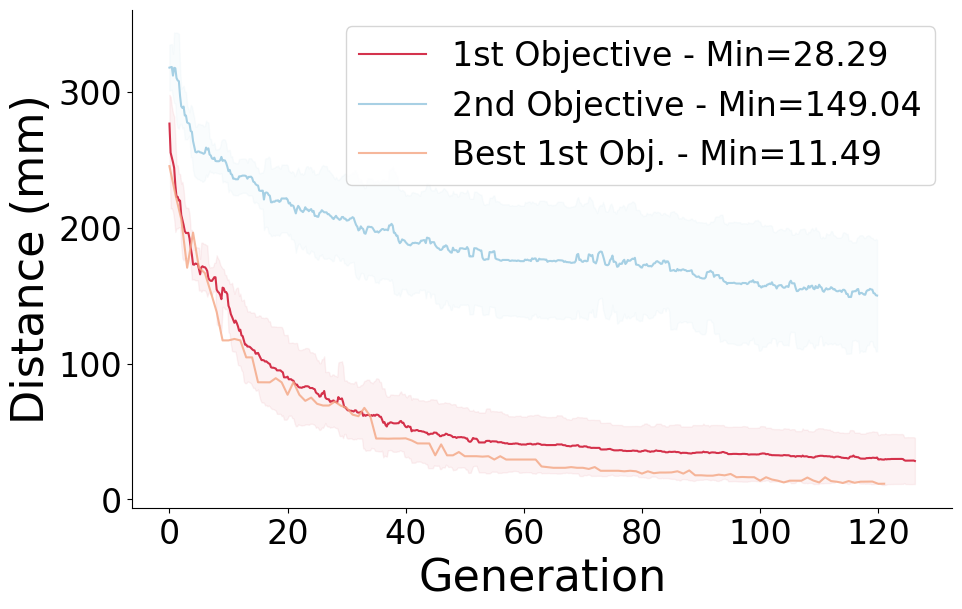

In [38]:
critere_y = "vDistMax"
critere_x = "Gen"
l_keys_used = ["fixedStart", "randomStart"]

label_used_here = {key : key for key in l_keys_used}
label_used_here["fixedStart"] = "1st Objective"
label_used_here["randomStart"] = "2nd Objective"
variance_info = True
min_max_info = False

plt.figure(figsize=(10,6))

max_wanted = False
func1, func2, text = (np.amax, np.argmax, "Max") if max_wanted else (np.amin, np.argmin, "Min")


for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in final_test_df[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in final_test_df[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index*2], alpha=0.8, label=label_used_here[key] + f' - {text}={func1(mean_values_y):.2f}')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index*2],  alpha=0.05)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index*2],  alpha=0.05)

print_seed_0 = True # Seed 0 is the champion
if print_seed_0:
    all_values_y = final_test_df["fixedStart"][0][critere_y]
    all_values_x = final_test_df["fixedStart"][0][critere_x]


    mean_values_y = all_values_y
    mean_values_x = all_values_x
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index], alpha=0.8, label="Best 1st Obj." + f' - {text}={func1(mean_values_y):.2f}')


classic_format()
plt.ylabel("Distance (mm)", fontsize=32)
plt.xlabel("Generation", fontsize=32)
plt.legend(fontsize=24)
plt.tick_params(axis='x', labelsize=24)
plt.tick_params(axis='y', labelsize=24)
plt.subplots_adjust(left=0.16, right=0.98, top=0.98, bottom=0.15)
plt.savefig('results/scoreGegelatiFT.pdf', format="pdf", dpi=1000)
plt.show()


### Results of the final tests (success)

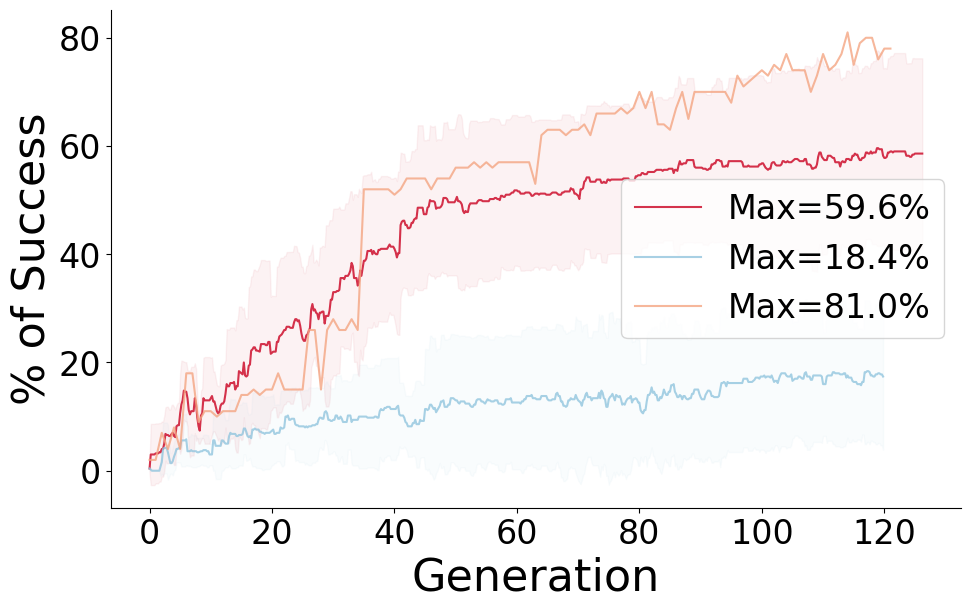

In [39]:
critere_y = "vSuccess"
critere_x = "Gen"
l_keys_used = ["fixedStart", "randomStart"]

label_used_here = {key : key for key in l_keys_used}
label_used_here["fixedStart"] = "1st Objective"
label_used_here["randomStart"] = "2nd Objective"
variance_info = True
min_max_info = False

plt.figure(figsize=(10,6))

max_wanted = True
func1, func2, text = (np.amax, np.argmax, "Max") if max_wanted else (np.amin, np.argmin, "Min")


for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in final_test_df[key]], axis=1)*100
    all_values_x = pd.concat([df[critere_x] for df in final_test_df[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index*2], alpha=0.8, label=f'{text}={func1(mean_values_y)}%')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index*2],  alpha=0.05)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index*2],  alpha=0.05)

print_seed_0 = True # Seed 0 is the champion
if print_seed_0:
    all_values_y = final_test_df["fixedStart"][0][critere_y]*100
    all_values_x = final_test_df["fixedStart"][0][critere_x]


    mean_values_y = all_values_y
    mean_values_x = all_values_x
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index], alpha=0.8, label=f'{text}={func1(mean_values_y)}%')


classic_format()
plt.ylabel("% of Success", fontsize=32)
plt.xlabel("Generation", fontsize=32)
plt.legend(fontsize=24)
plt.tick_params(axis='x', labelsize=24)
plt.tick_params(axis='y', labelsize=24)
plt.subplots_adjust(left=0.13, right=0.98, top=0.98, bottom=0.15)
plt.savefig('results/successGegelatiFT.pdf', format="pdf", dpi=1000)
plt.show()

## Results of the Soft Actor-Critic (SAC)

### Loading the training results of the SAC

In [40]:
path = "data/SAC/"

l_keys = ["fixedStart", "randomStart"]
training_sac_df = dict()

for index, key in enumerate(l_keys):
    l_dataframe_sac = []
    for i in range(5):
        l_dataframe_sac.append(pd.read_csv(path+key+"/outLogsSeed" + str(i) +"/logsSAC.ods", sep='\s+'))
    training_sac_df[key] = l_dataframe_sac


l_dataframe_sac[0].describe()

,Gen,Tdistance,Treward,Vdistance,Vreward,Success,T_Train,T_Learn,T_valid,T_total
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,64.924700,-22699.234900,68.761500,-23705.585200,0.386200,162.492700,96.346200,59.847400,11973.387000
std,29.011492,44.653388,9235.739685,40.188921,7912.571068,0.164941,22.155274,13.738217,8.471412,6343.474765
min,0.000000,23.490000,-80484.010000,33.190000,-76098.570000,0.010000,121.580000,70.110000,45.550000,282.720000
25%,24.750000,44.065000,-23577.792500,51.812500,-24921.495000,0.280000,144.250000,85.020000,53.225000,6692.265000
50%,49.500000,52.925000,-20312.795000,58.625000,-21789.760000,0.420000,160.245000,95.545000,58.180000,12363.895000
75%,74.250000,67.987500,-18149.277500,72.527500,-19855.517500,0.530000,178.785000,107.115000,65.242500,17408.062500
max,99.000000,363.620000,-14067.820000,353.840000,-16076.170000,0.640000,206.720000,124.340000,79.820000,22234.010000


### Results of the SAC (distance)

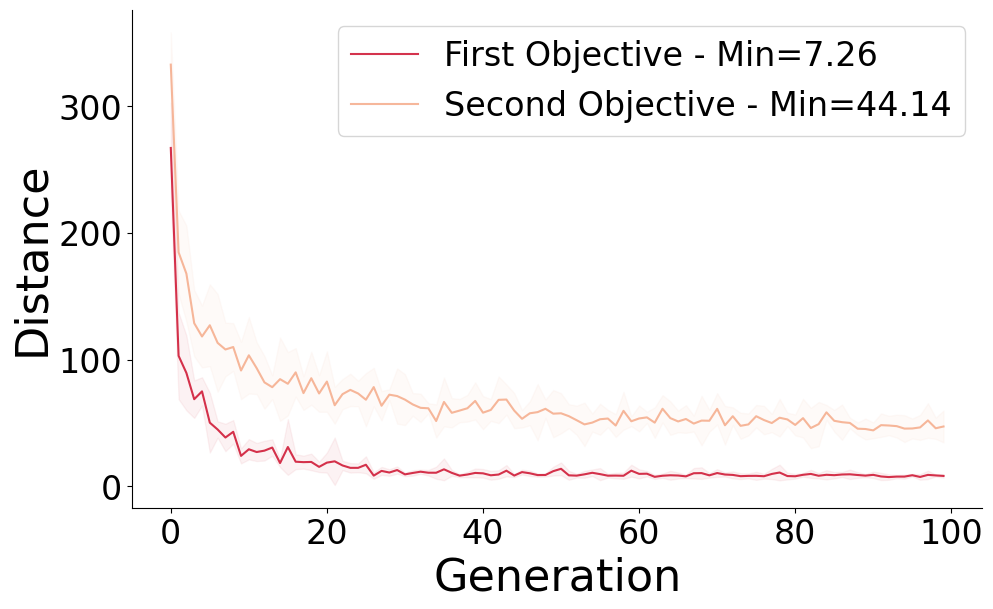

In [41]:
critere_y = "Vdistance"
critere_x = "Gen"
l_keys_used = ["fixedStart", 'randomStart']
label_used_here = {key : key for key in l_keys_used}
label_used_here["fixedStart"] = "First Objective"
label_used_here["randomStart"] = "Second Objective"
variance_info = True
min_max_info = False

plt.figure(figsize=(10,6))

max_wanted = False
func1, func2, text = (np.amax, np.argmax, "Max") if max_wanted else (np.amin, np.argmin, "Min")


for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in training_sac_df[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_sac_df[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index], alpha=0.8, label=label_used_here[key] + f' - {text}={func1(mean_values_y):.2f}')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index],  alpha=0.05)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index],  alpha=0.05)

classic_format()
plt.ylabel("Distance", fontsize=32)
plt.xlabel("Generation", fontsize=32)
plt.legend(fontsize=24)
plt.tick_params(axis='x', labelsize=24)
plt.tick_params(axis='y', labelsize=24)
plt.subplots_adjust(left=0.13, right=0.98, top=0.98, bottom=0.15)
plt.savefig('results/distanceSAC.pdf', format="pdf", dpi=1000)
plt.show()

### Results of the SAC (success)

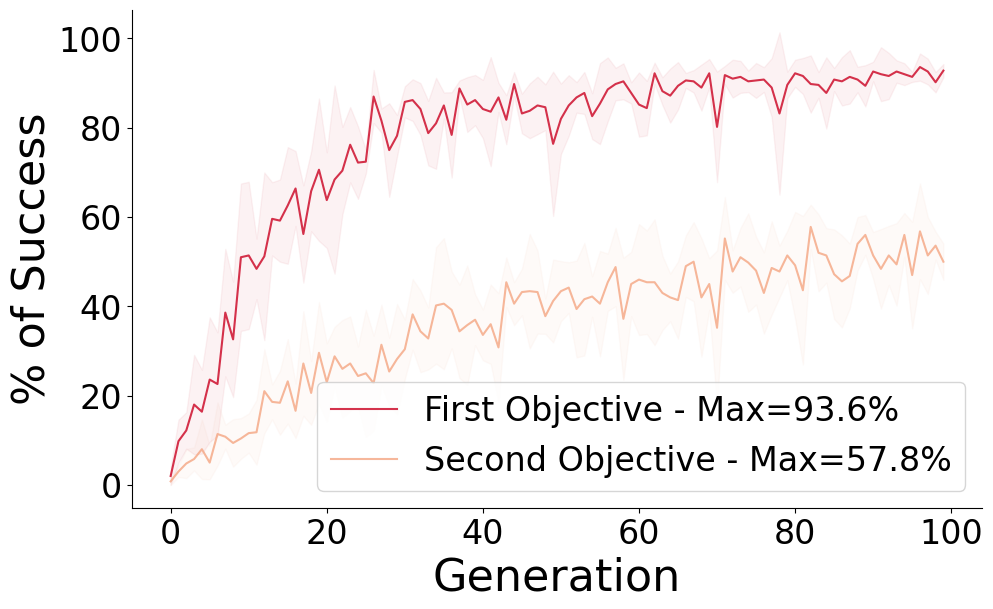

In [42]:
critere_y = "Success"
critere_x = "Gen"
l_keys_used = ["fixedStart", 'randomStart']
label_used_here = {key : key for key in l_keys_used}
label_used_here["fixedStart"] = "First Objective"
label_used_here["randomStart"] = "Second Objective"
variance_info = True
min_max_info = False

plt.figure(figsize=(10,6))

max_wanted = True
func1, func2, text = (np.amax, np.argmax, "Max") if max_wanted else (np.amin, np.argmin, "Min")


for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in training_sac_df[key]], axis=1)*100
    all_values_x = pd.concat([df[critere_x] for df in training_sac_df[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index], alpha=0.8, label=label_used_here[key] + f' - {text}={func1(mean_values_y)}%')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index],  alpha=0.05)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index],  alpha=0.05)

classic_format()
plt.ylabel("% of Success", fontsize=32)
plt.xlabel("Generation", fontsize=32)
plt.legend(fontsize=24)
plt.tick_params(axis='x', labelsize=24)
plt.tick_params(axis='y', labelsize=24)
plt.subplots_adjust(left=0.13, right=0.98, top=0.98, bottom=0.15)
plt.savefig('results/SuccessSAC.pdf', format="pdf", dpi=1000)
plt.show()

## Comparison between TPGs and SAC

### Results of SAC and TPGS (distance)

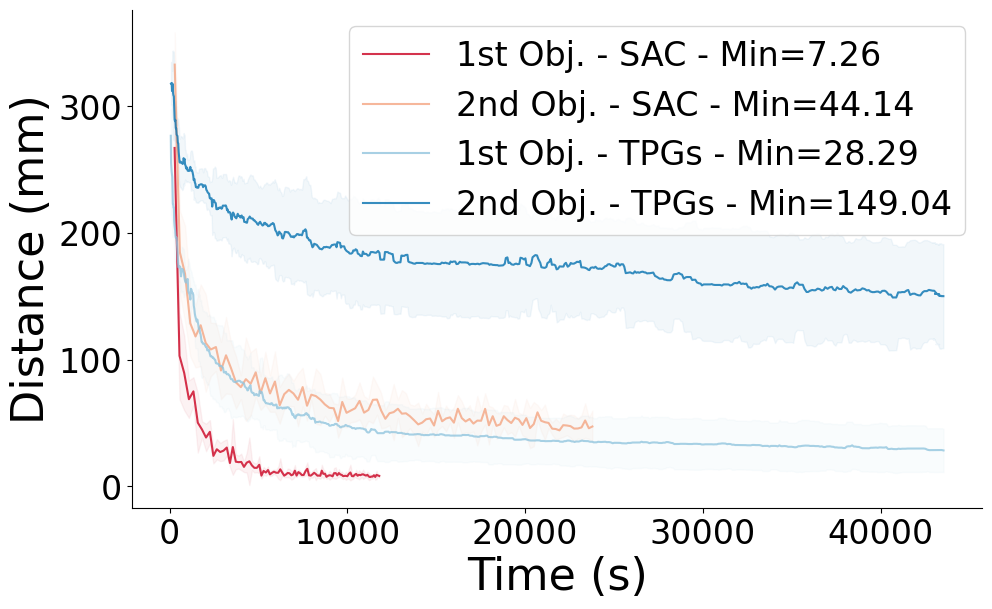

In [46]:
critere_y = "Vdistance"
critere_x = "T_total"
l_keys_used = ["fixedStart", "randomStart"]
label_used_here = {key : key for key in l_keys_used}
label_used_here["fixedStart"] = "1st Obj. - SAC"
label_used_here["randomStart"] = "2nd Obj. - SAC"
variance_info = True
min_max_info = False

plt.figure(figsize=(10,6))

max_wanted = False
func1, func2, text = (np.amax, np.argmax, "Max") if max_wanted else (np.amin, np.argmin, "Min")


for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in training_sac_df[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_sac_df[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index], alpha=0.8, label=label_used_here[key] + f' - {text}={func1(mean_values_y):.2f}')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index],  alpha=0.05)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index],  alpha=0.05)



critere_y = "vDistMax"
l_keys_used = ["fixedStart", "randomStart"]

label_used_here = {key : key for key in l_keys_used}
label_used_here["fixedStart"] = "1st Obj. - TPGs"
label_used_here["randomStart"] = "2nd Obj. - TPGs"
func1, func2, text = (np.amax, np.argmax, "Max") if max_wanted else (np.amin, np.argmin, "Min")


for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in final_test_df[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in final_test_df[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index+2], alpha=0.8, label=label_used_here[key] + f' - {text}={func1(mean_values_y):.2f}')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index+2],  alpha=0.05)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index+2],  alpha=0.05)

classic_format()
plt.xlabel("Time (s)", fontsize=32)
plt.legend(fontsize=24)
plt.tick_params(axis='x', labelsize=24)
plt.tick_params(axis='y', labelsize=24)
plt.ylabel("Distance (mm)", fontsize=32)
plt.subplots_adjust(left=0.13, right=0.98, top=0.98, bottom=0.15)
plt.savefig('results/distanceTrainingSacGeg.pdf', format="pdf", dpi=100)
plt.show()

### Results of SAC and TPGS (success)

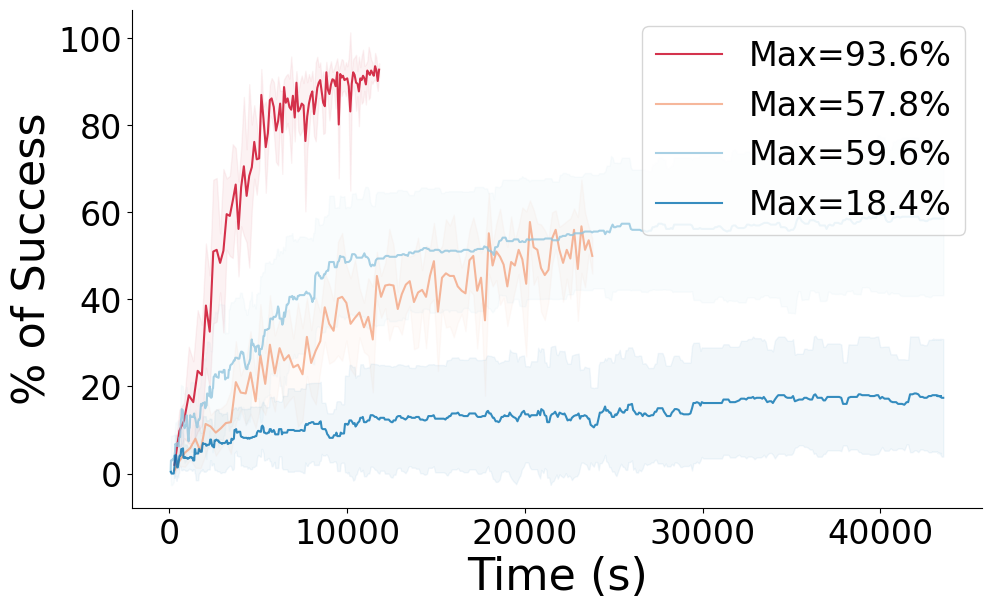

In [47]:
critere_y = "Success"
critere_x = "T_total"
l_keys_used = ["fixedStart", "randomStart"]
label_used_here = {key : key for key in l_keys_used}
label_used_here["fixedStart"] = "1st Obj. - SAC"
label_used_here["randomStart"] = "2nd Obj. - SAC"
variance_info = True
min_max_info = False

plt.figure(figsize=(10,6))

max_wanted = True
func1, func2, text = (np.amax, np.argmax, "Max") if max_wanted else (np.amin, np.argmin, "Min")


for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in training_sac_df[key]], axis=1)*100
    all_values_x = pd.concat([df[critere_x] for df in training_sac_df[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index], alpha=0.8, label=f'{text}={func1(mean_values_y)}%')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index],  alpha=0.05)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index],  alpha=0.05)



critere_y = "vSuccess"
l_keys_used = ["fixedStart", "randomStart"]

label_used_here = {key : key for key in l_keys_used}
label_used_here["fixedStart"] = "1st Obj. - TPGs"
label_used_here["randomStart"] = "2nd Obj. - TPGs"
func1, func2, text = (np.amax, np.argmax, "Max") if max_wanted else (np.amin, np.argmin, "Min")


for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in final_test_df[key]], axis=1)*100
    all_values_x = pd.concat([df[critere_x] for df in final_test_df[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index+2], alpha=0.8, label=f'{text}={func1(mean_values_y)}%')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index+2],  alpha=0.05)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index+2],  alpha=0.05)

classic_format()
plt.ylabel("% of Success", fontsize=32)
plt.xlabel("Time (s)", fontsize=32)
plt.legend(fontsize=24, loc="upper right")
plt.tick_params(axis='x', labelsize=24)
plt.tick_params(axis='y', labelsize=24)
plt.subplots_adjust(left=0.13, right=0.98, top=0.98, bottom=0.15)
plt.savefig('results/successTrainingSacGeg.pdf', format="pdf", dpi=100)
plt.show()

### Loading testing results of SAC and TPGs

In [49]:

all_labels = []
testing_df = dict()
path = "data/SAC/"
name_keys = ['fixedStart', 'randomStart']
l_keys = ['SAC First Objective', 'SAC Second Objective']

for index, key in enumerate(l_keys):
    l_dataframe = []
    for i in range(5):
        print(path+key+"/outLogsSeed" + str(i) +"/outputSAC.csv")
        l_dataframe.append(pd.read_csv(path+name_keys[index]+"/outLogsSeed" + str(i) +"/outputSAC.csv", usecols=np.arange(0,15)))
        l_dataframe[-1]["TimeAction"] = l_dataframe[-1]["Duration(ms)"] / l_dataframe[-1]["NbActions"]
        l_dataframe[-1]["Distance"] = l_dataframe[-1]["Distance"]/1000
        l_dataframe[-1]["Score"] = l_dataframe[-1]["Score"]/1000
        all_labels.append(key + "_" + str(i))
    testing_df[key] = l_dataframe


path = "data/GegelatiFinalTests/"
l_keys = ["TPGs First Objective", "TPGs Second Objective", "Hybrid First Objective", "Hybrid Second Objective"]


for index, key in enumerate(l_keys):
    l_dataframe = []
    for i in range(5):
        
        if(index < 2):
            file = "/outLogs/outputGegelati.csv"
        else:
            file = "/outputGegelati.csv"
        print(path+"config_" + str(index) + "_"+ str(i) + file)
        l_dataframe.append(pd.read_csv(path+"config_" + str(index) + "_"+ str(i) +file, usecols=np.arange(0,15)))
        l_dataframe[-1]["TimeAction"] = l_dataframe[-1]["Duration(ms)"] / l_dataframe[-1]["NbActions"]
        l_dataframe[-1]["Distance"] = l_dataframe[-1]["Distance"]/1000
        l_dataframe[-1]["Score"] = l_dataframe[-1]["Score"]/1000
        all_labels.append(key + "_" + str(i))
    testing_df[key] = l_dataframe


l_dataframe[0].describe()

data/SAC/SAC First Objective/outLogsSeed0/outputSAC.csv
data/SAC/SAC First Objective/outLogsSeed1/outputSAC.csv
data/SAC/SAC First Objective/outLogsSeed2/outputSAC.csv
data/SAC/SAC First Objective/outLogsSeed3/outputSAC.csv
data/SAC/SAC First Objective/outLogsSeed4/outputSAC.csv
data/SAC/SAC Second Objective/outLogsSeed0/outputSAC.csv
data/SAC/SAC Second Objective/outLogsSeed1/outputSAC.csv
data/SAC/SAC Second Objective/outLogsSeed2/outputSAC.csv
data/SAC/SAC Second Objective/outLogsSeed3/outputSAC.csv
data/SAC/SAC Second Objective/outLogsSeed4/outputSAC.csv
data/GegelatiFinalTests/config_0_0/outLogs/outputGegelati.csv
data/GegelatiFinalTests/config_0_1/outLogs/outputGegelati.csv
data/GegelatiFinalTests/config_0_2/outLogs/outputGegelati.csv
data/GegelatiFinalTests/config_0_3/outLogs/outputGegelati.csv
data/GegelatiFinalTests/config_0_4/outLogs/outputGegelati.csv
data/GegelatiFinalTests/config_1_0/outLogs/outputGegelati.csv
data/GegelatiFinalTests/config_1_1/outLogs/outputGegelati.csv
d

,armPos0,armPos1,armPos2,armPos3,armPos4,armPos5,targetPos0,targetPos1,targetPos2,Duration(ms),Score,Distance,Success,NbActions,MotorPos,TimeAction
count,99.000000,99.000000,99.000000,99.000000,99.0,99.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2100.626263,1914.262626,2074.565657,2174.181818,512.0,256.0,13.232323,53.828283,233.696970,81525.292929,-728.485152,34.355485,0.666667,858.808081,2101.838384,78.201724
std,1224.829714,522.889999,576.758910,574.769614,0.0,0.0,200.866786,207.538294,130.796107,85253.541886,1031.833574,85.319298,0.473804,447.547140,1224.370273,59.717423
min,28.000000,1033.000000,1078.000000,1025.000000,512.0,256.0,-352.000000,-373.000000,9.000000,102.000000,-5299.826000,2.532000,0.000000,88.000000,33.000000,0.673333
25%,1038.000000,1488.000000,1595.500000,1730.500000,512.0,256.0,-151.000000,-105.500000,135.000000,17070.000000,-849.873500,4.323000,0.000000,499.500000,1040.500000,27.123700
50%,2118.000000,1848.000000,2123.000000,2208.000000,512.0,256.0,20.000000,67.000000,219.000000,51917.000000,-337.603000,4.821000,1.000000,731.000000,2113.000000,78.275439
75%,3185.500000,2370.500000,2540.500000,2653.000000,512.0,256.0,186.500000,211.500000,333.000000,131498.000000,-108.146500,18.504000,1.000000,1500.000000,3190.500000,116.267333
max,4073.000000,3033.000000,3068.000000,3063.000000,512.0,256.0,420.000000,435.000000,508.000000,343529.000000,14.120000,503.286000,1.000000,1500.000000,4073.000000,229.019333


### Testing results of SAC and TPGs 

In [51]:
critere_y = "Distance"
critere_z = "Success"
l_keys_used =  ['SAC First Objective', 'SAC Second Objective', 'TPGs First Objective', 'TPGs Second Objective', "Hybrid First Objective", "Hybrid Second Objective"]


for index, key in enumerate(l_keys_used):
    all_values_z = [df[critere_z].mean() for df in testing_df[key]]
    all_values_y = [df[critere_y].mean() for df in testing_df[key]]

    print("{}($\\pm{}$) & {}($\\pm{}$)\\%  \\\\".format(
        np.around(np.mean(all_values_y),1),  np.around(np.std(all_values_y),1), np.around(np.mean(all_values_z)*100),  np.around(np.std(all_values_z)*100
        )))





22.0($\pm8.3$) & 86.0($\pm2.0$)\%  \\
42.8($\pm6.2$) & 53.0($\pm2.0$)\%  \\
29.3($\pm15.8$) & 59.0($\pm17.0$)\%  \\
152.7($\pm36.8$) & 18.0($\pm12.0$)\%  \\
7.8($\pm1.6$) & 95.0($\pm2.0$)\%  \\
36.1($\pm20.5$) & 69.0($\pm11.0$)\%  \\


### BoxPlot of time per action of SAC and TPGs

Mean Time SAC: 82.24962057577275 µs -- Mean Time TPGs: 0.8100475555766454 µs -- Time SAC / Time TPGs: 101.53678016745823


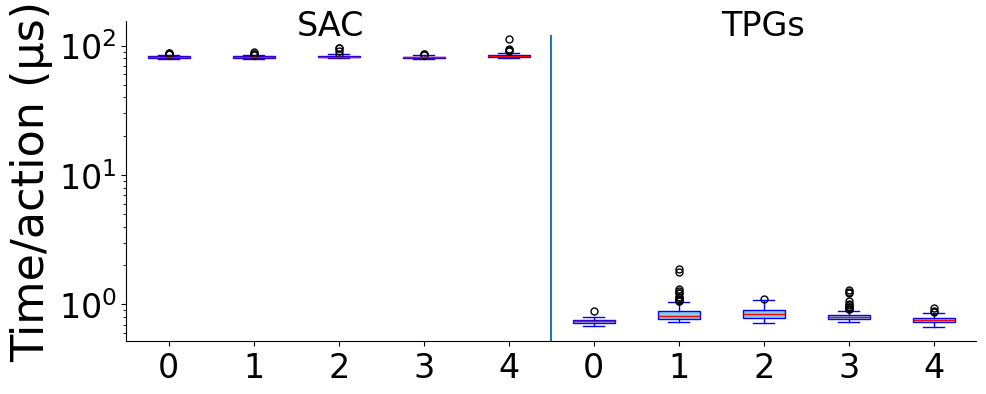

In [52]:
# Création du graphique
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.boxplot([df_sac["TimeAction"] for df_sac in testing_df["SAC First Objective"]] + [df_gegelati["TimeAction"] for df_gegelati in testing_df["TPGs First Objective"]],
                            patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor='skyblue', color='blue'),  # Couleur des boîtes
            whiskerprops=dict(color='blue'),  # Couleur des whiskers
            capprops=dict(color='blue'),  # Couleur des caps
            medianprops=dict(color='red'),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )
ax1.set_yscale('log') 
# Labels et titre

meanTimeSac = np.mean([df_sac["TimeAction"] for df_sac in testing_df["SAC First Objective"]])
meanTimeTPGs = np.mean([df_sac["TimeAction"] for df_sac in testing_df["TPGs First Objective"]])
print("Mean Time SAC: {} µs -- Mean Time TPGs: {} µs -- Time SAC / Time TPGs: {}".format(
    meanTimeSac, meanTimeTPGs, meanTimeSac/meanTimeTPGs
))
    
ax1.text(2.5, 120, "SAC", fontsize=24)
ax1.text(7.5, 120, "TPGs", fontsize=24)

ax1.plot(np.ones(120)*5.5, np.arange(120))
classic_format()
plt.xticks(range(1,11), list(range(5)) + list(range(5)))
plt.tick_params(axis='x', labelsize=24)
plt.tick_params(axis='y', labelsize=24)
plt.ylabel("Time/action (µs)", fontsize=32)
plt.subplots_adjust(left=0.13, right=0.98, top=0.95, bottom=0.15)
plt.savefig('results/boxPlotTimeAction.pdf', format="pdf", dpi=100)
# Affichage du graphique
plt.show()

### BoxPlot of distance of SAC and TPGs

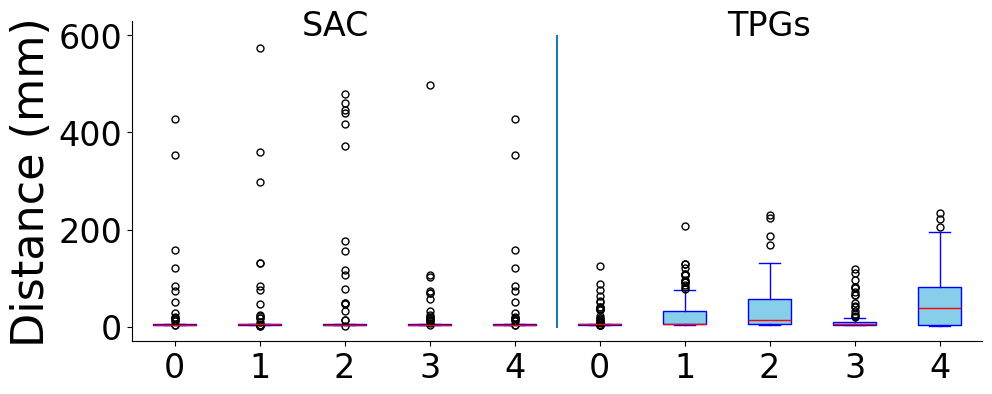

In [53]:
# Création du graphique
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.boxplot(
    [df_sac["Distance"] for df_sac in testing_df["SAC First Objective"]] + [df_gegelati["Distance"] for df_gegelati in testing_df["TPGs First Objective"]],
                patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor='skyblue', color='blue'),  # Couleur des boîtes
            whiskerprops=dict(color='blue'),  # Couleur des whiskers
            capprops=dict(color='blue'),  # Couleur des caps
            medianprops=dict(color='red'),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )


ax1.text(2.5, 600, "SAC", fontsize=24)
ax1.text(7.5, 600, "TPGs", fontsize=24)

ax1.plot(np.ones(600)*5.5, np.arange(600))

classic_format()

plt.xticks(range(1,11), list(range(5)) + list(range(5)))
plt.tick_params(axis='x', labelsize=24)
plt.tick_params(axis='y', labelsize=24)
plt.ylabel("Distance (mm)", fontsize=32)
plt.subplots_adjust(left=0.13, right=0.98, top=0.95, bottom=0.15)
plt.savefig('results/boxPlotDistance.pdf', format="pdf", dpi=100)
# Affichage du graphique
plt.show()

### BoxPlot of distance of SAC and TPGs (second objective)

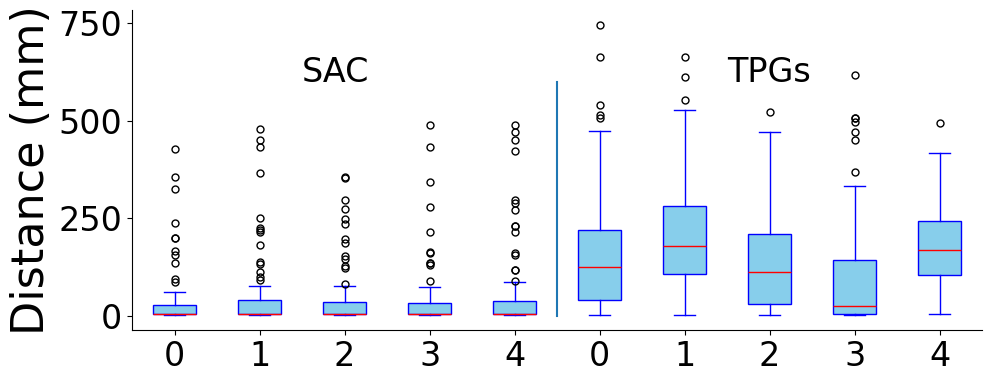

In [54]:
# Création du graphique
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.boxplot(
    [df_sac["Distance"] for df_sac in testing_df["SAC Second Objective"]] + [df_gegelati["Distance"] for df_gegelati in testing_df["TPGs Second Objective"]],
                patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor='skyblue', color='blue'),  # Couleur des boîtes
            whiskerprops=dict(color='blue'),  # Couleur des whiskers
            capprops=dict(color='blue'),  # Couleur des caps
            medianprops=dict(color='red'),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )


ax1.text(2.5, 600, "SAC", fontsize=24)
ax1.text(7.5, 600, "TPGs", fontsize=24)

ax1.plot(np.ones(600)*5.5, np.arange(600))

classic_format()

plt.xticks(range(1,11), list(range(5)) + list(range(5)))
plt.tick_params(axis='x', labelsize=24)
plt.tick_params(axis='y', labelsize=24)
plt.ylabel("Distance (mm)", fontsize=32)
plt.subplots_adjust(left=0.13, right=0.98, top=0.95, bottom=0.15)
# Affichage du graphique
plt.show()

### Time per action compare to the distance reached for the SAC, TPGs and hybrid version

C:\Users\qvacher\AppData\Local\Temp\ipykernel_12632\912816025.py:40: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, max((max(data_tpgs_x), max(data_sac_x), max(data_sac_x2), max(data_tpgs_x2)))*1.1)


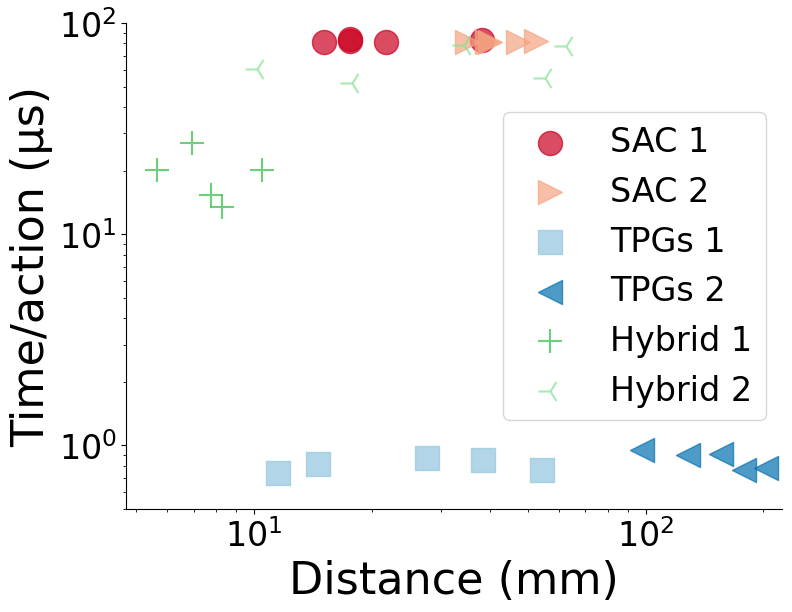

In [55]:
fig = plt.figure(figsize=(8,6))
label_1= "SAC 1"
data_sac_x = [df_sac["Distance"].mean() for df_sac in testing_df["SAC First Objective"]]
data_sac_y = [df_sac["TimeAction"].mean() for df_sac in testing_df["SAC First Objective"]]

label_2 = "TPGs 1"
data_tpgs_x = [df_tpgs["Distance"].mean() for df_tpgs in testing_df["TPGs First Objective"]]
data_tpgs_y = [df_tpgs["TimeAction"].mean() for df_tpgs in testing_df["TPGs First Objective"]]

label_3 = "Hybrid 1"
data_hybr_x = [df_tpgs["Distance"].mean() for df_tpgs in testing_df["Hybrid First Objective"]]
data_hybr_y = [df_tpgs["TimeAction"].mean() for df_tpgs in testing_df["Hybrid First Objective"]]


label_4= "SAC 2"
data_sac_x2 = [df_sac["Distance"].mean() for df_sac in testing_df["SAC Second Objective"]]
data_sac_y2 = [df_sac["TimeAction"].mean() for df_sac in testing_df["SAC Second Objective"]]

label_5= "TPGs 2"
data_tpgs_x2 = [df_tpgs["Distance"].mean() for df_tpgs in testing_df["TPGs Second Objective"]]
data_tpgs_y2 = [df_tpgs["TimeAction"].mean() for df_tpgs in testing_df["TPGs Second Objective"]]

label_6= "Hybrid 2"
data_hybr_x2 = [df_tpgs["Distance"].mean() for df_tpgs in testing_df["Hybrid Second Objective"]]
data_hybr_y2 = [df_tpgs["TimeAction"].mean() for df_tpgs in testing_df["Hybrid Second Objective"]]

plt.scatter(data_sac_x, data_sac_y, color=l_colors[0], label=label_1, alpha=0.7, s=300, zorder = 0, marker="o")
plt.scatter(data_sac_x2, data_sac_y2, color=l_colors[1], label=label_4, alpha=0.7, s=300, zorder = 5, marker=">")
plt.scatter(data_tpgs_x, data_tpgs_y, color=l_colors[2], label=label_2, alpha=0.7, s=300, zorder=10, marker="s")
plt.scatter(data_tpgs_x2, data_tpgs_y2, color=l_colors[3], label=label_5, alpha=0.7, s=300, zorder=10, marker="<")
plt.scatter(data_hybr_x, data_hybr_y, color="#2DBD42", label=label_3, alpha=0.7, s=300, zorder=10, marker="+")
plt.scatter(data_hybr_x2, data_hybr_y2, color="#84E291", label=label_6, alpha=0.7, s=300, zorder=10, marker="3")

classic_format()


plt.yscale('log')
plt.xscale('log')
plt.ylim(0.5, 100)
plt.xlim(0, max((max(data_tpgs_x), max(data_sac_x), max(data_sac_x2), max(data_tpgs_x2)))*1.1)
plt.xlabel("Distance (mm)", fontsize=32)
plt.ylabel("Time/action (µs)", fontsize=32)
plt.legend(fontsize=24)
plt.tick_params(axis='x', labelsize=24)
plt.tick_params(axis='y', labelsize=24)
plt.subplots_adjust(left=0.16, right=0.98, top=0.96, bottom=0.15)
plt.savefig('results/compTimeDistLog.pdf', format="pdf", dpi=1000)
plt.show()